In [1]:
from __future__ import print_function, division
from badlands.model import Model as badlandsModel
import numpy as np
from scipy.spatial import cKDTree
from numpy import genfromtxt
import matplotlib.pyplot as plt
import math, csv
def interpolateArray(coords=None, z=None, dz=None):
    """
    Interpolate the irregular spaced dataset from badlands on a regular grid.
    """
    x, y = np.hsplit(coords, 2)
    dx = (x[1]-x[0])[0]

    nx = int(((x.max() - x.min())/dx+1) - 2)
    ny = int(((y.max() - y.min())/dx+1) - 2)
    xi = np.linspace(x.min(), x.max(), nx)
    yi = np.linspace(y.min(), y.max(), ny)

    xi, yi = np.meshgrid(xi, yi)
    xyi = np.dstack([xi.flatten(), yi.flatten()])[0]
    XY = np.column_stack((x,y))

    tree = cKDTree(XY)
    distances, indices = tree.query(xyi, k=3)
    if len(z[indices].shape) == 3:
        z_vals = z[indices][:,:,0]
        dz_vals = dz[indices][:,:,0]
    else:
        z_vals = z[indices]
        dz_vals = dz[indices]

    zi = np.average(z_vals,weights=(1./distances), axis=1)
    dzi = np.average(dz_vals,weights=(1./distances), axis=1)
    onIDs = np.where(distances[:,0] == 0)[0]
    if len(onIDs) > 0:
        zi[onIDs] = z[indices[onIDs,0]]
        dzi[onIDs] = dz[indices[onIDs,0]]
    zreg = np.reshape(zi,(ny,nx))
    dzreg = np.reshape(dzi,(ny,nx))
    
    return zreg,dzreg


In [4]:
a = np.loadtxt("data/elev_master_50km.csv")
b = np.loadtxt("AUSP1306/Paleotopo/Paleotopo_P100_50km_prec2.csv")
c = np.loadtxt("AUSP1311/Paleotopo/Paleotopo_P100_50km_prec2.csv")
d = np.loadtxt("AUSP1307/Paleotopo/Paleotopo_P100_50km_prec2.csv")

f = np.loadtxt("data/final_erdp.txt")

a = a[:,2].reshape(a.shape[0],1)
b = b[:,2].reshape(b.shape[0],1)
c = c[:,2].reshape(c.shape[0],1)
d = d[:,2].reshape(d.shape[0],1)

In [5]:
a = a.reshape((f.shape[0], f.shape[1]))
b = b.reshape((f.shape[0], f.shape[1]))
c = c.reshape((f.shape[0], f.shape[1]))
d = d.reshape((f.shape[0], f.shape[1]))


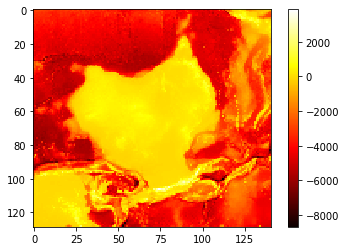

In [6]:
a.shape
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()
plt.close()

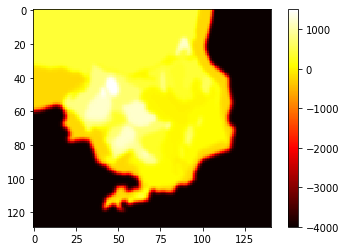

In [7]:
b.shape
plt.imshow(b, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()
plt.close()

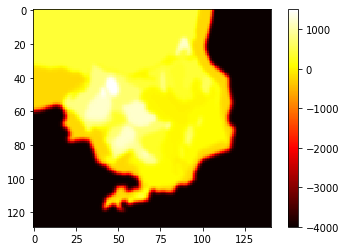

In [8]:
c.shape
plt.imshow(c, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()
plt.close()

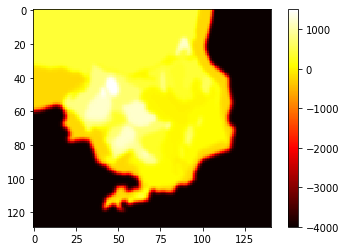

In [9]:
d.shape
plt.imshow(d, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()
plt.close()